In [46]:
from pycaret.datasets import get_data
import pandas as pd

dataset = pd.read_csv('FPL_data_hist.csv')
dataset.head()
print(dataset.shape) #612, 12

(407, 13)


In [47]:
data = dataset.sample(frac=0.85, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (346, 13)
Unseen Data For Predictions: (61, 13)


In [48]:
from pycaret.regression import *
s = setup(data = data, target = 'roi', session_id=123445)

,Description,Value
0,Session id,123445
1,Target,roi
2,Target type,Regression
3,Original data shape,"(346, 13)"
4,Transformed data shape,"(346, 47)"
5,Transformed train set shape,"(242, 47)"
6,Transformed test set shape,"(104, 47)"
7,Numeric features,8
8,Categorical features,4
9,Preprocess,True


In [50]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:54:23
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,1.1609,3.0162,1.6792,0.9432,0.1545,0.2032,0.0090
en,Elastic Net,1.2926,3.0017,1.7209,0.9420,0.1852,0.2936,0.0100
lasso,Lasso Regression,1.3175,3.1238,1.7589,0.9397,0.1890,0.3013,0.0080
llar,Lasso Least Angle Regression,1.3174,3.1234,1.7588,0.9397,0.1890,0.3013,0.0080
knn,K Neighbors Regressor,1.8410,5.8931,2.4026,0.8851,0.2479,0.3381,0.0090
par,Passive Aggressive Regressor,2.0685,14.1064,3.4081,0.7503,0.1698,0.2023,0.0060
et,Extra Trees Regressor,3.6874,18.4516,4.2750,0.6498,0.5169,1.2456,0.0200
ada,AdaBoost Regressor,3.2986,19.2819,4.0962,0.6054,0.4569,1.1709,0.0120
omp,Orthogonal Matching Pursuit,3.5038,24.3134,4.2175,0.5066,0.4785,1.3941,0.0060
lightgbm,Light Gradient Boosting Machine,4.2101,25.5735,4.9421,0.4978,0.5472,1.4203,0.1130


In [51]:
huber = create_model('huber')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:54:51
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6952,7.2289,2.6887,0.8895,0.1379,0.1344
1,1.1090,2.8850,1.6985,0.9594,0.1607,0.1551
2,1.3882,4.6030,2.1455,0.9151,0.1397,0.1544
3,1.2237,3.2521,1.8034,0.9410,0.1696,0.1817
4,0.9839,1.4524,1.2051,0.9723,0.1196,0.1107
5,1.0774,1.6812,1.2966,0.9739,0.1634,0.2603
6,1.0129,3.3592,1.8328,0.8996,0.1388,0.1494
7,1.1132,1.5938,1.2624,0.9649,0.2567,0.5586
8,0.9348,1.7762,1.3327,0.9666,0.1285,0.1637


In [52]:
en = create_model('en')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:54:56
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4121,4.2569,2.0632,0.9349,0.1806,0.2984
1,1.0399,2.2802,1.5100,0.9679,0.1221,0.1113
2,1.4532,3.6865,1.9200,0.9320,0.1601,0.2071
3,1.1884,2.8703,1.6942,0.9479,0.1351,0.1376
4,1.2004,2.1125,1.4534,0.9597,0.1311,0.1278
5,1.3263,2.5626,1.6008,0.9602,0.2086,0.3614
6,1.2013,3.0242,1.7390,0.9096,0.1706,0.2253
7,1.2499,2.3035,1.5177,0.9493,0.3120,0.7656
8,1.3070,2.9683,1.7229,0.9442,0.2175,0.3928


In [53]:
tuned_huber = tune_model(huber)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:55:00
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:55:00
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Huber Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6274,6.2194,2.4939,0.9049,0.1397,0.1488
1,1.0793,2.7936,1.6714,0.9606,0.1863,0.1716
2,1.3676,4.0504,2.0126,0.9253,0.1249,0.1257
3,1.1664,2.8712,1.6945,0.9479,0.1489,0.1591
4,1.0786,1.8312,1.3532,0.9650,0.1289,0.1243
5,0.9518,1.4696,1.2123,0.9772,0.1129,0.1212
6,0.9979,3.1241,1.7675,0.9066,0.1038,0.1760
7,1.1422,1.7513,1.3234,0.9614,0.2708,0.6018
8,0.9074,1.5882,1.2602,0.9702,0.1520,0.1795


In [54]:
tuned_en = tune_model(en)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:55:16
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:55:16
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Elastic Net


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:55:16
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Results
Estimator,. . . . . . . . . . . . . . . . . .,Elastic Net


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3869,4.2517,2.0620,0.9350,0.1815,0.2983
1,1.1144,2.4519,1.5658,0.9655,0.1254,0.1139
2,1.4209,3.5950,1.8960,0.9337,0.1602,0.2064
3,1.2385,3.0099,1.7349,0.9454,0.1385,0.1405
4,1.2395,2.2642,1.5047,0.9568,0.1347,0.1302
5,1.3389,2.7314,1.6527,0.9576,0.2132,0.3681
6,1.2329,3.1381,1.7715,0.9062,0.1715,0.2270
7,1.2479,2.3997,1.5491,0.9472,0.3221,0.8080
8,1.3476,3.1536,1.7758,0.9407,0.2172,0.3903


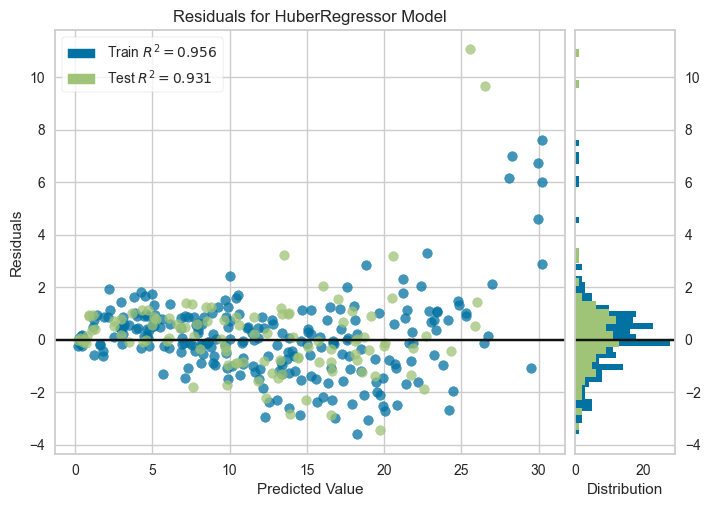

In [55]:
plot_model(tuned_huber)

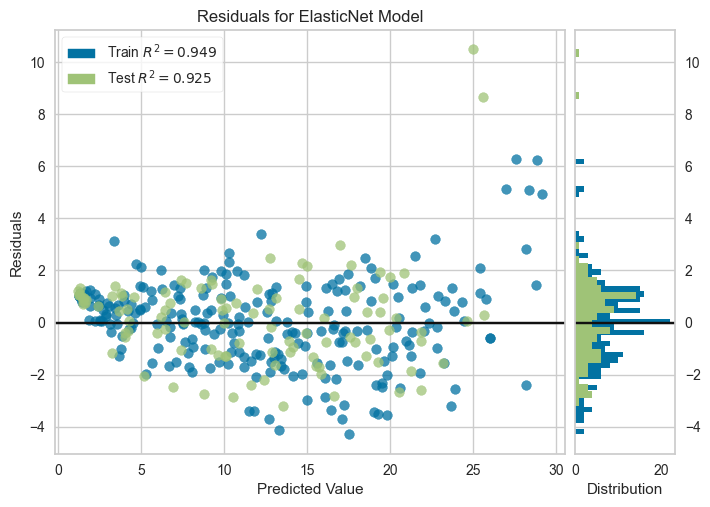

In [56]:
plot_model(tuned_en)

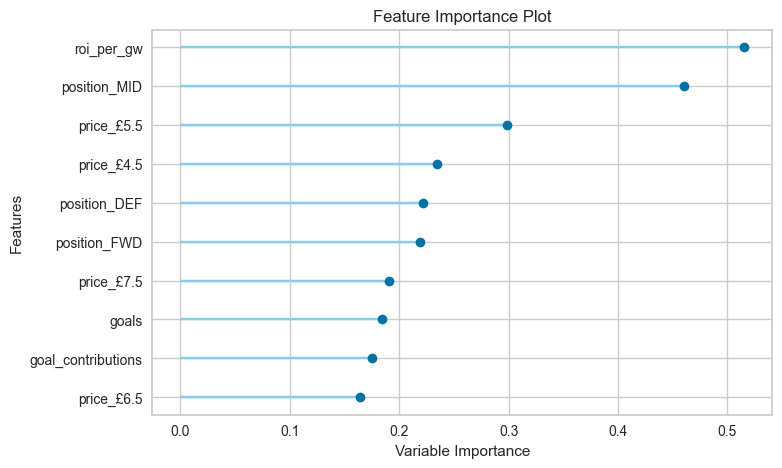

In [57]:
plot_model(tuned_huber, plot='feature')

In [58]:
final_huber = finalize_model(tuned_huber)

In [59]:
print(final_huber)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['goals', 'assists',
                                             'goal_contributions',
                                             'games_played', 'minutes',
                                             'total_points', 'points_per_game',
                                             'roi_per_gw'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['name', 'price', 'team',
                                             'position'],
                                    transformer=SimpleImputer(stra...
                 TransformerWrapper(include=['price', 'team', 'position'],
                                    transformer=OneHotEncoder(cols=['price',
                                                                    'team',
                                              

In [60]:
unseen_predictions = predict_model(final_huber, data=data_unseen)
unseen_predictions.head(100)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,1.0916,2.1521,1.4670,0.9636,0.1608,0.2260


,name,price,team,goals,assists,goal_contributions,games_played,minutes,total_points,points_per_game,roi_per_gw,position,roi,prediction_label
0,Havertz,£8.0,Arsenal,13,10,23,30,2627,180,4.9,0.750000,FWD,22.500000,25.561847
1,Jorginho,£5.0,Arsenal,0,2,2,10,913,44,1.8,0.880000,MID,8.800000,8.153947
2,Thomas,£5.0,Arsenal,0,0,0,9,785,24,1.7,0.533333,MID,4.800000,5.249828
3,White,£6.5,Arsenal,4,5,9,35,2987,182,4.9,0.800000,DEF,28.000000,30.499899
4,Archer,£5.0,Aston Villa,4,3,7,21,1829,82,2.7,0.780952,FWD,16.400000,14.718079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,N.Aguerd,£4.5,West Ham,1,0,1,21,1857,36,1.7,0.380952,DEF,8.000000,9.526915
57,Bellegarde,£5.0,Wolves,2,2,4,10,948,45,2.0,0.900000,MID,9.000000,7.808443
58,Fábio Silva,£5.0,Wolves,0,0,0,3,259,8,1.0,0.533333,FWD,1.600000,2.722069
59,Hee Chan,£6.5,Wolves,12,3,15,25,2116,125,4.3,0.769200,MID,19.230000,17.786952
